In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image
from keras.models import Sequential
# To initialize neural network
from keras.layers import Convolution2D
# Images are two dimensional, concolution step
from keras.layers import MaxPooling2D
# Pooling step
from keras.layers import Flatten
# Convert pools feature map into this large feature vector
from keras.layers import Dense
#To add fully connected layers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import decode_predictions
from keras.applications.xception import Xception
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras import applications
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
# To initialize neural network
from keras.layers import Convolution2D
# Images are two dimensional, concolution step
from keras.layers import MaxPooling2D
# Pooling step
from keras.layers import Flatten
# Convert pools feature map into this large feature vector
from keras.layers import Dense
#To add fully connected layers
from keras.preprocessing.image import ImageDataGenerator
# from keras.applications.resnet50 import ResNet50
from keras.applications import resnet50
from keras.models import Model
import keras

In [7]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/imagesdata-20201224T162256Z-001.zip (Unzipped Files)/imagesdata/train',
    target_size = (300,300),
    batch_size = 32,
    class_mode = 'categorical')
validation_generator = test_dataset.flow_from_directory(
    '/content/drive/MyDrive/imagesdata-20201224T162256Z-001.zip (Unzipped Files)/imagesdata/test',
    target_size = (300,300),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False)

Found 1853 images belonging to 2 classes.
Found 241 images belonging to 2 classes.


Found 241 images belonging to 2 classes.


219062272/219055592 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 8, 8, 1536)        54336736  
_________________________________________________________________
flatten (Flatten)            (None, 98304)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 196610    
Total params: 54,533,346
Trainable params: 196,610
Non-trainable params: 54,336,736
_________________________________________________________________
None


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
4/4 [==============================] - 122s 32s/step - loss: 10.3995 - accuracy: 0.6844 - val_loss: 4.5622 - val_accuracy: 0.7012
Epoch 2/30
4/4 [==============================] - 41s 10s/step - loss: 8.2613 - accuracy: 0.4250 - val_loss: 13.0394 - val_accuracy: 0.3029
Epoch 3/30
4/4 [==============================] - 36s 9s/step - loss: 2.5337 - accuracy: 0.7104 - val_loss: 3.1885 - val_accuracy: 0.5768
Epoch 4/30
4/4 [==============================] - 34s 9s/step - loss: 2.4688 - accuracy: 0.6719 - val_loss: 17.5216 - val_accuracy: 0.3029
Epoch 5/30
4/4 [==============================] - 32s 8s/step - loss: 3.4252 - accuracy: 0.7792 - val_loss: 4.2546 - val_accuracy: 0.5934
Epoch 6/30
4/4 [==============================] - 33s 9s/step - loss: 2.4786 - accuracy: 0.7552 - val_loss: 12.1024 - val_accuracy: 0.3651
Epoch 7/30
4/4 [==============================] - 29s 8s/step - loss: 1.2923 - accuracy: 0.8396 - val_loss: 7.9752 - val_accuracy: 0.4315
Epoch 8/30
4/4 [===========

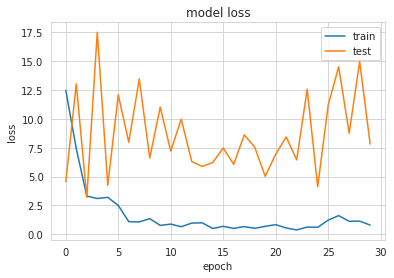

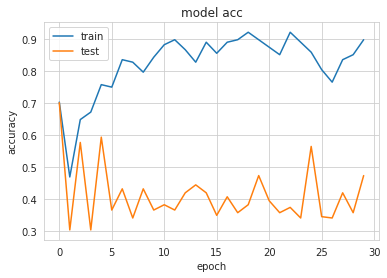

[[ 69 100]
 [ 27  45]]
              precision    recall  f1-score   support

           0       0.72      0.41      0.52       169
           1       0.31      0.62      0.41        72

    accuracy                           0.47       241
   macro avg       0.51      0.52      0.47       241
weighted avg       0.60      0.47      0.49       241



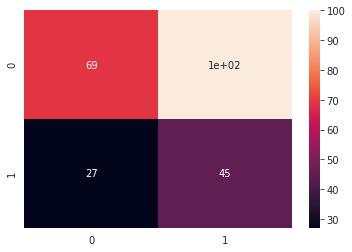

In [8]:

IMAGE_SIZE = 300
pretrained_model = applications.InceptionResNetV2(input_shape=(300,300, 3), include_top=False)
pretrained_model.trainable = False

model = Sequential([
    pretrained_model,
    Flatten(),
    Dense(2, activation='softmax')
])
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
print(model.summary())
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=4,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps=None
)
################################################ VISUALZATION ###################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
%matplotlib inline
history = hist
sns.set_style("whitegrid")
np.random.seed(697)
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

################################################################################ CF ########################################
from sklearn.metrics import confusion_matrix
import numpy
pred= model.predict(validation_generator)
# print(pred)
pred = np.argmax(pred,axis=1)
# print(pred)
true_classes = validation_generator.classes
cm = confusion_matrix(true_classes,pred)
print(cm)
sns.heatmap(cm, annot=True)
################################################## CF Report ##########################################

import sklearn.metrics as metrics
# class_labels = list(validation_generator.class_indices.keys())  
report = metrics.classification_report(true_classes, pred)
print(report)


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101v2 (Functional)     (None, 10, 10, 2048)      42626560  
_________________________________________________________________
flatten_8 (Flatten)          (None, 204800)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 409602    
Total params: 43,036,162
Trainable params: 409,602
Non-trainable params: 42,626,560
_________________________________________________________________
None
Epoch 1/30
4/4 [==============================] - 13s 2s/step - loss: 9.2962 - accuracy: 0.6188 - val_loss: 5.6300 - val_accuracy: 0.5643
Epoch 2/30
4/4 [==============================] - 6s 2s/step - loss: 8.6042 - accuracy: 0.5524 - val_loss: 25.8531 - val_accuracy: 0.3112
Epoch 3/30
4/4 [==============================] - 6s 2s/step - loss: 4.6152 - accurac

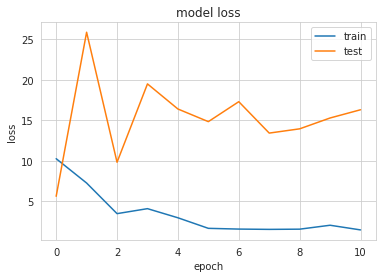

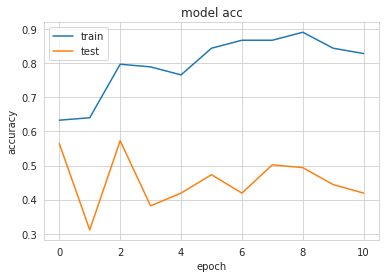

[[111  58]
 [ 45  27]]
              precision    recall  f1-score   support

           0       0.71      0.66      0.68       169
           1       0.32      0.38      0.34        72

    accuracy                           0.57       241
   macro avg       0.51      0.52      0.51       241
weighted avg       0.59      0.57      0.58       241



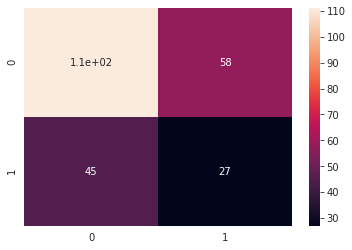

In [18]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.applications.resnet_v2 import ResNet101V2
IMAGE_SIZE = 300
pretrained_model = applications.ResNet101V2(input_shape=(300,300, 3), include_top=False)
pretrained_model.trainable = False

model = Sequential([
    pretrained_model,
    Flatten(),
    Dense(2, activation='softmax')
])

earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('ResNet101V2.hdf5', save_best_only=True, monitor='val_accuracy', mode='max')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
print(model.summary())
hist = model.fit(   
    train_generator,
    steps_per_epoch=4,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps=None,
    callbacks=[earlyStopping, mcp_save, reduce_lr_loss]
    
)
################################################ VISUALZATION ###################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
%matplotlib inline
history = hist
sns.set_style("whitegrid")
np.random.seed(697)
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

################################################################################ CF ########################################
from sklearn.metrics import confusion_matrix
import numpy
model = load_model('ResNet101V2.hdf5')
pred= model.predict(validation_generator)
# print(pred)
pred = np.argmax(pred,axis=1)
# print(pred)
true_classes = validation_generator.classes
cm = confusion_matrix(true_classes,pred)
print(cm)
sns.heatmap(cm, annot=True)
################################################## CF Report ##########################################

import sklearn.metrics as metrics
# class_labels = list(validation_generator.class_indices.keys())  
report = metrics.classification_report(true_classes, pred)
print(report)


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
IMAGE_SIZE = 300
pretrained_model = applications.InceptionResNetV2(input_shape=(300,300, 3), include_top=False)
pretrained_model.trainable = False

model = Sequential([
    pretrained_model,
    Flatten(),
    Dense(2, activation='softmax')
])

earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('InceptionResnet.hdf5', save_best_only=True, monitor='val_accuracy', mode='max')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
print(model.summary())
hist = model.fit(   
    train_generator,
    steps_per_epoch=4,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps=None,
    callbacks=[earlyStopping, mcp_save, reduce_lr_loss]
    
)
################################################ VISUALZATION ###################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
%matplotlib inline
history = hist
sns.set_style("whitegrid")
np.random.seed(697)
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

################################################################################ CF ########################################
from sklearn.metrics import confusion_matrix
import numpy
model = load_model('InceptionResnet.hdf5')
pred= model.predict(validation_generator)
# print(pred)
pred = np.argmax(pred,axis=1)
# print(pred)
true_classes = validation_generator.classes
cm = confusion_matrix(true_classes,pred)
print(cm)
sns.heatmap(cm, annot=True)
################################################## CF Report ##########################################

import sklearn.metrics as metrics
# class_labels = list(validation_generator.class_indices.keys())  
report = metrics.classification_report(true_classes, pred)
print(report)

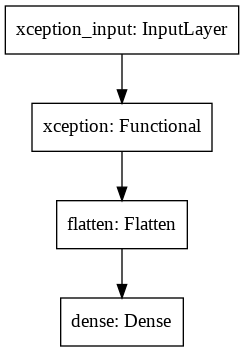

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='xray-unceptionv3.png')

**Model Summary**